# Prevendo Customer Churn em Operadoras de Telecom

Data: 11, de Novembro de 2021

###### Descrição do problema:
Neste projeto vamos realizar uma previssão do Customer Churn de uma operadora de Telecom

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre)
refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento 
comercial. Refere-se também à perda de clientes.

Como principal desafio, será necessario criar um modelo classificativo para extrair a informação se um cliente vai cancelar seu 
plano (Sim ou Não) e a probabilidade de uma opção ou outra.


## Importação dos Pacotes Necessarios

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Carregando os Dados

In [2]:
train = pd.read_csv('dataset/projeto4_telecom_treino.csv')
train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
test = pd.read_csv('dataset/projeto4_telecom_teste.csv')
test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


# Analise Exploratoria dos Dados

### Analise Inicial dos Dados

In [4]:
# Verificando o shape do dataset
train.shape

(3333, 21)

In [5]:
# Verificando o nome das Variaveis:
for i in train.columns:
    print(i)

Unnamed: 0
state
account_length
area_code
international_plan
voice_mail_plan
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
churn


In [6]:
# Excluindo a coluna Unnamed: 0

train = train.drop('Unnamed: 0', axis = 1)
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
# Verificando se existe valores NA
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
# Criando uma função para realizar criar um resumo estatistico dos Dados:
def resumo_var(cols, df):
    
    for col in cols: 
        print('\t COLUMN: ', col)
        print('\t type: ', df[col].dtype,'\n')
        print(df[col].describe(),'\n')

In [9]:
# Realizando o resumo estatistico das Variaveis
resumo_var(train.columns, train)

	 COLUMN:  state
	 type:  object 

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object 

	 COLUMN:  account_length
	 type:  int64 

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64 

	 COLUMN:  area_code
	 type:  object 

count              3333
unique                3
top       area_code_415
freq               1655
Name: area_code, dtype: object 

	 COLUMN:  international_plan
	 type:  object 

count     3333
unique       2
top         no
freq      3010
Name: international_plan, dtype: object 

	 COLUMN:  voice_mail_plan
	 type:  object 

count     3333
unique       2
top         no
freq      2411
Name: voice_mail_plan, dtype: object 

	 COLUMN:  number_vmail_messages
	 type:  int64 

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%      

### Analise avançada dos Dados

Nessa parte tenho como premissa entender melhor como os dados estão distribuidos, como os dados se comportam, as melhores variaveis, etc...

In [10]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [11]:
# Criando um Dataset com os clientes insatisfeitos
apoio = train['churn'] == 'yes'
df = train[apoio]

# Criando um Dataset com os Clientes Satisfeitos
apoio = train['churn'] == 'no'
dt = train[apoio]

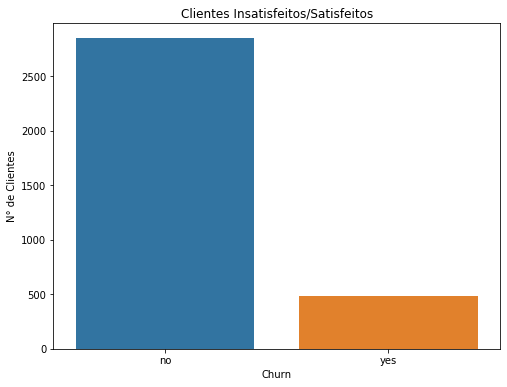

In [12]:
# Comparando os clientes satisfeitos/Insatisfeitos

# Criando o gráfico
plt.figure(figsize = [8, 6])
sns.countplot(x = 'churn', data = train)
plt.title('Clientes Insatisfeitos/Satisfeitos')
plt.xlabel('Churn')
plt.ylabel('N° de Clientes')
plt.show()

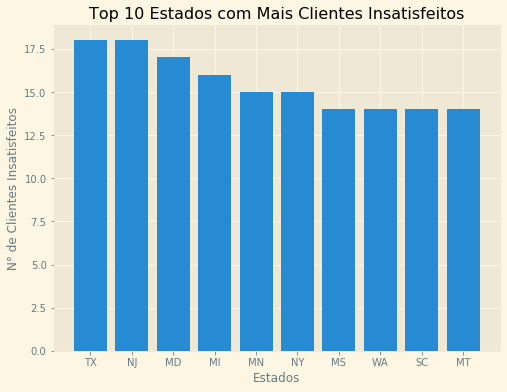

In [13]:
# Criando um gráfico para entender em qual estado os clientes ficam mais insatisfeitos
estados = dict(df['state'].value_counts()[0:10]).keys()
valores = dict(df['state'].value_counts()[0:10]).values()

# Criando o gráfico
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])
plt.bar(estados, valores)
plt.title('Top 10 Estados com Mais Clientes Insatisfeitos')
plt.xlabel('Estados')
plt.ylabel('N° de Clientes Insatisfeitos')
plt.show()

Como podemos ver no gráfico, podemos ver que nos Estados Nova Jersey, Texas e Maryland são os estados onde os clientes mais ficam insatisfeitos.

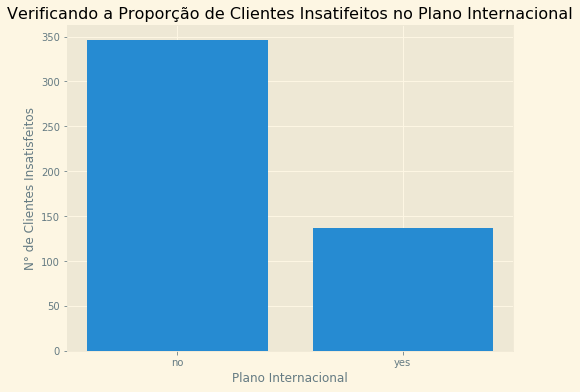

In [14]:
# Criando um gráfico para entender em qual estado os clientes ficam mais insatisfeitos
international = dict(df['international_plan'].value_counts()).keys()
valores = dict(df['international_plan'].value_counts()).values()

# Criando o gráfico
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])
plt.bar(international, valores)
plt.title('Verificando a Proporção de Clientes Insatifeitos no Plano Internacional')
plt.xlabel('Plano Internacional')
plt.ylabel('N° de Clientes Insatisfeitos')
plt.show()

Outro Insight que podemos obter é que os Clientes que possuem o plano Internacional, possui menos chance de cancelar o plano com a empresa

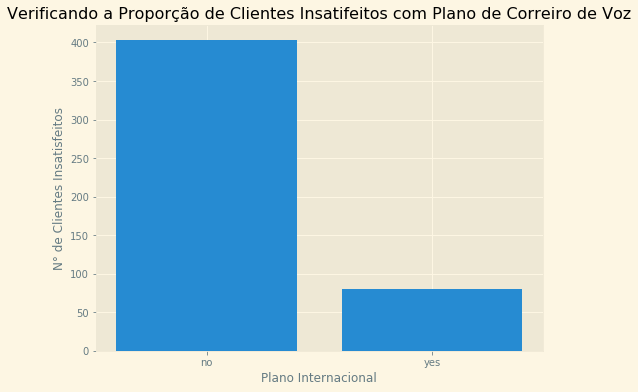

In [15]:
# Criando um gráfico para entender em qual estado os clientes ficam mais insatisfeitos
international = dict(df['voice_mail_plan'].value_counts()).keys()
valores = dict(df['voice_mail_plan'].value_counts()).values()

# Criando o gráfico
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])
plt.bar(international, valores)
plt.title('Verificando a Proporção de Clientes Insatifeitos com Plano de Correiro de Voz')
plt.xlabel('Plano Internacional')
plt.ylabel('N° de Clientes Insatisfeitos')
plt.show()

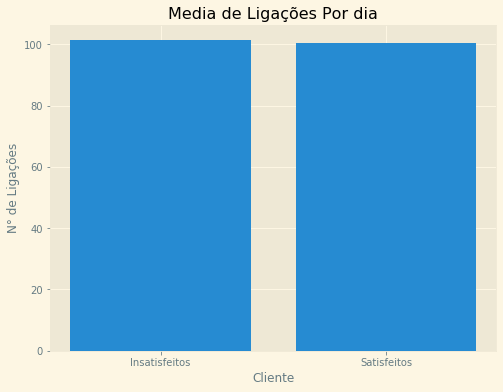

In [16]:
valores = [df['total_day_calls'].mean(), dt['total_day_calls'].mean()]
grupos = ['Insatisfeitos', 'Satisfeitos']


# Criando o gráfico
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])
plt.bar(grupos, valores)
plt.title('Media de Ligações Por dia')
plt.xlabel('Cliente')
plt.ylabel('N° de Ligações')
plt.show()

Como podemos ver, não existe diferença no Numero de Ligações realizadas por Dia para que um cliente esteja insatisfeito

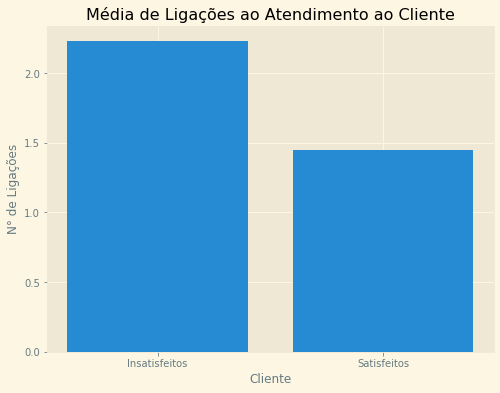

In [17]:
valores = [df['number_customer_service_calls'].mean(), dt['number_customer_service_calls'].mean()]
grupos = ['Insatisfeitos', 'Satisfeitos']


# Criando o gráfico
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])
plt.bar(grupos, valores)
plt.title('Média de Ligações ao Atendimento ao Cliente')
plt.xlabel('Cliente')
plt.ylabel('N° de Ligações')
plt.show()

É possivel notar que os Clientes que não estão satisfeitos com o seu plano, tendem a ligar ao Customer Service da empresa mais vezes

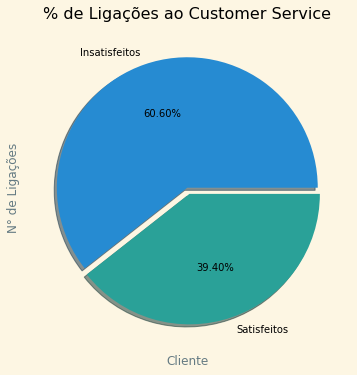

In [18]:
# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0.05) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.style.use("Solarize_Light2")
plt.figure(figsize = [8, 6])

plt.pie(valores, labels=grupos, autopct='%1.2f%%', shadow=True, explode=explode)
plt.title('% de Ligações ao Customer Service')
plt.xlabel('Cliente')
plt.ylabel('N° de Ligações')
plt.show()

Outro insight possivel de coletar, é que ~60% dos clientes que ligam para o Customer Service estão Insatisfeitos

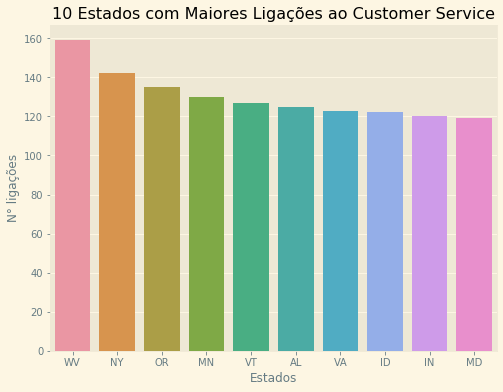

In [19]:
# Criando um gráfico para entender em qual estado os clientes ficam mais insatisfeitos
apoio = train.groupby('state')['number_customer_service_calls'].sum().sort_values(ascending=False)[:10].reset_index()

# Criando o gráfico
plt.figure(figsize = [8, 6])
sns.barplot(x = 'state', y = 'number_customer_service_calls', data = apoio)
plt.title('10 Estados com Maiores Ligações ao Customer Service')
plt.xlabel('Estados')
plt.ylabel('N° ligações')
plt.show()

# Pré Processamento dos Dados

Após uma profunda analise dos dados e obtenção de insights valiosos, irei realizar o pré processamento dos dados.
Nessa etapa vou realizar algumas transformações no meu dataset, como por exemplo padronização e normalização dos dados

In [20]:
# Para facilitar a previsão dos dados, irei transformar as variaveis yes/no por 1/0
train['churn'] = train['churn'].replace(['no', 'yes'], [0,1])

# Irei aplicar a memsa logíca para todos as variaveis que são yes/no
train['international_plan'] = train['international_plan'].replace(['no', 'yes'], [0,1])
train['voice_mail_plan'] = train['voice_mail_plan'].replace(['no', 'yes'], [0,1])

In [21]:
# Separando a variável target, das features do conjunto de dados.
VarTreino, targetTreino = train.drop('churn', axis = 1), np.array(train.churn).ravel()

In [22]:
# Separando as variaveis numericas de strings
VarTreino = VarTreino._get_numeric_data()

# Criando uma lista com as variaveis com 
strings = ['state', 'area_code']
VarTreinoStr = train[strings]

VarTreino

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


### Realizando normalização nos Dados

In [23]:
scaler = MinMaxScaler()
# Aplicando a escala no Dataset
VarTreinoNormalizadas = scaler.fit_transform(VarTreino)

# Criando um DataFrame com os resultados obtidos.
VarTreinoNormalizadas = pd.DataFrame(data = VarTreinoNormalizadas, columns = VarTreino.columns)

VarTreinoNormalizadas.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333


### Realizando Padronização nos Dados

In [24]:
Standard = StandardScaler()

# Aplicando a escala no Dataset
VarTreinoPadronizadas = Standard.fit_transform(VarTreino)

# Criando um DataFrame com os resultados obtidos.
VarTreinoPadronizadas = pd.DataFrame(data = VarTreinoPadronizadas, columns = VarTreino.columns)

VarTreinoPadronizadas.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


### Feature Selection

####  Eliminação Recursiva de Atributos

Esta é uma técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnia é chamada Recursive Feature Elimination (RFE).

In [25]:
# Para a utilização correta da ferramenta, irei utilizar os dados NORMALIZADOS
X = VarTreinoNormalizadas
Y = targetTreino

# Criando a instancia da ferramenta para selecionar as top 5 variaveis
rfe = RFE (estimator= xgb.XGBClassifier(), 
    n_features_to_select = 5)

# Realizando o treinamento
rfeFit = rfe.fit (X = X, 
                  y = Y)

In [26]:
# Capturando o nome das melhores variáveis preditoras.
rfeVAR = X.columns[rfeFit.support_]

# Exibindo o nome das melhores variáveis preditoras.
rfeVAR

Index(['international_plan', 'voice_mail_plan', 'total_day_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')

#### Forward Selection

O Forward Selection é um método iterativo, no qual começamos sem ter nenhum recurso no modelo. A cada iteração, adicionamos uma variável que melhora o modelo e efetuamos este procedimento até que a performance do modelo pare de evoluir.

In [27]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.
tFeatures = VarTreinoNormalizadas

# Instanciando um objeto da classe SFS para selecionar as 5 melhores variáveis preditoras segundo sua acurácia, 
# utilizando o algoritmo XGBClassifer.

sfs = SFS (
    estimator  = xgb.XGBClassifier(), 
    k_features = 5,
    forward    = True, 
    floating   = False, 
    verbose    = 2,
    scoring    = 'roc_auc',
    cv         = 3)

# Capturando as melhores variáveis preditoras.
sfs = sfs.fit(
    X = tFeatures, 
    y = targetTreino)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.4s finished

[2021-11-14 21:47:56] Features: 1/5 -- score: 0.6420507791217175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.5s finished

[2021-11-14 21:48:00] Features: 2/5 -- score: 0.7642737277977553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.2s finished

[2021-11-14 21:48:05] Features: 3/5 -- score: 0.8386586030293124[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [28]:
# Capturando o nome das melhores variáveis preditoras.
fs = tFeatures.columns[list(sfs.k_feature_idx_)]

# Exibindo o nome das melhores variáveis preditoras.
fs

Index(['international_plan', 'number_vmail_messages', 'total_day_charge',
       'total_eve_charge', 'number_customer_service_calls'],
      dtype='object')

In [29]:
#Verficando se ambas técnicas obtiveram o mesmo resultado:
print(rfeVAR)
print(fs)

Index(['international_plan', 'voice_mail_plan', 'total_day_minutes',
       'total_intl_calls', 'number_customer_service_calls'],
      dtype='object')
Index(['international_plan', 'number_vmail_messages', 'total_day_charge',
       'total_eve_charge', 'number_customer_service_calls'],
      dtype='object')


Como podemos ver, ouve algumas diferenças e igualdades

Como igualdade, ambos os modelos escolheram as variaveis: international_plan, number_customer_service_calls

###### Pela técnica de RFE, temos as variaveis: voice_mail_plan, total_day_minutes e total_intl_calls

###### Pela técnica de Forward Selection, temos as variaveis: number_vmail_messages, total_day_charge, total_eve_charge

# Analise Preditiva / Avaliação de Perfomance

Nessa etapa irei realizar diversos testes para descobrir qual é o melhor pré processamento que devo utilizar nos dados. Utilizando como principal métrica a curva ROC

### Dados Sem Transformação (RFE)

LR: 0.808589 (0.037067)
LDA: 0.813102 (0.037981)
NB: 0.841363 (0.042398)
KNN: 0.740202 (0.040725)
CART: 0.722126 (0.024123)
SVM: 0.738251 (0.048493)
XGBoost: 0.861315 (0.034115)


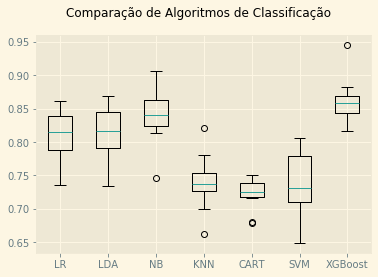

In [30]:
# Carregando os dados
array = VarTreino[rfeVAR].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Dados Sem Transformação (Forward Selection)

LR: 0.811581 (0.047814)
LDA: 0.817633 (0.044701)
NB: 0.846116 (0.047970)
KNN: 0.778981 (0.042487)
CART: 0.772986 (0.032290)
SVM: 0.831874 (0.039544)
XGBoost: 0.893697 (0.035427)


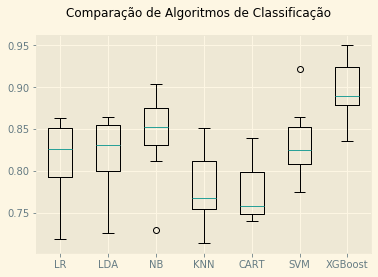

In [31]:
# Carregando os dados
array = VarTreino[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Podemos ver que utilizando o cojunto de variaveis pela Forward Selection, teve um desempenho um pouco melhor.
E em ambos os casos, o melhor modelo foi o XGBoost.

### Dados Normalizados com Forward Selection

LR: 0.813475 (0.048318)
LDA: 0.817633 (0.044701)
NB: 0.846116 (0.047970)
KNN: 0.864162 (0.036348)
CART: 0.775043 (0.032614)
SVM: 0.893630 (0.034707)
XGBoost: 0.893656 (0.035341)


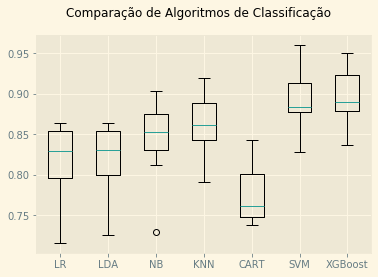

In [32]:
# Carregando os dados
array = VarTreinoNormalizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Dados Padronizados com Forward Selection

LR: 0.811942 (0.047747)
LDA: 0.817633 (0.044701)
NB: 0.846116 (0.047970)
KNN: 0.864084 (0.033525)
CART: 0.771100 (0.032929)
SVM: 0.895863 (0.034965)
XGBoost: 0.893699 (0.035244)


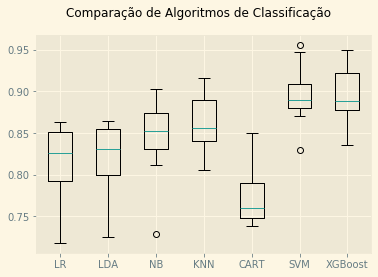

In [33]:
# Carregando os dados
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Com essa nova rodada de teste, podemos ver que a melhor técnica de pré processamento de dados foi a Padronização, com um desempenho maximo de 0.893699 no Modelo XGBoost

### Dados Normalizados com RFE

LR: 0.809905 (0.038973)
LDA: 0.813102 (0.037981)
NB: 0.841363 (0.042398)
KNN: 0.836626 (0.026870)
CART: 0.722569 (0.025871)
SVM: 0.857410 (0.032155)
XGBoost: 0.861354 (0.034121)


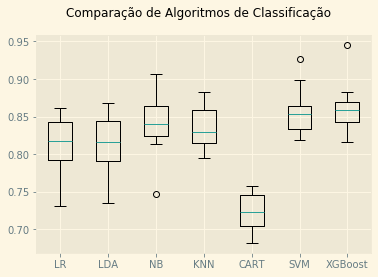

In [34]:
# Carregando os dados
array = VarTreinoNormalizadas[rfeVAR].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Dados Padronizados com RFE

LR: 0.809029 (0.037465)
LDA: 0.813102 (0.037981)
NB: 0.841363 (0.042398)
KNN: 0.836680 (0.023014)
CART: 0.720827 (0.024576)
SVM: 0.849483 (0.036427)
XGBoost: 0.861274 (0.034301)


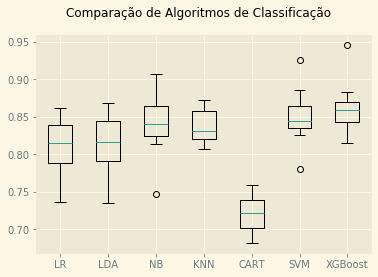

In [35]:
# Carregando os dados
array = VarTreinoPadronizadas[rfeVAR].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Podemos concluir com essa rodada de teste que a melhor técnica de padronização nos dados foi utilizando a técnica da Padronização e com as variaveis do Forward Selection

### Rebalanceando a classes de clientes

Como apenas existem muito mais dados de clientes iatisfeitos, pode acontecer do nosso algoritimo aprender muito como identificar clientes satisfeitos porém não conseguir realizar uma boa previsão para clientes insatisfeitos. 

Para tentar evitar esse problema, vou utilizar a técnica SMOTE (Synthetic Minority Over-sampling Technique)

Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados.

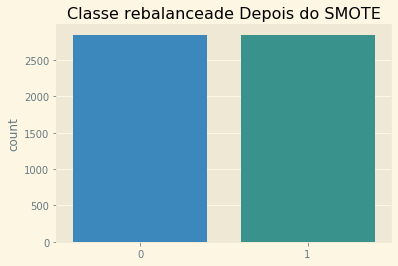

In [36]:
# Criando a instancia
smt = SMOTE()

# Carregando os dados
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Realizando o rebalanceamento das classes
VarTreinoSMOTE, targetTreinoSMOTE = smt.fit_sample(X, Y)

sns.countplot(targetTreinoSMOTE)
plt.title('Classe rebalanceade Depois do SMOTE')
plt.show()

### Dados Padronizados e Rebalanceados com SMOTE

LR: 0.726140 (0.028380)
LDA: 0.723860 (0.032598)
NB: 0.767895 (0.088363)
KNN: 0.881930 (0.029711)
CART: 0.876842 (0.020336)
SVM: 0.874912 (0.015336)
XGBoost: 0.902632 (0.013228)


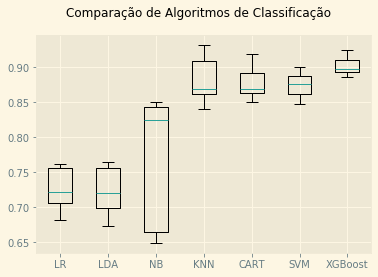

In [37]:
# Carregando os dados
array = VarTreinoSMOTE

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreinoSMOTE

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('XGBoost', xgb.XGBClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Avalição Detalhada dos Melhores Modelos

Na primeira fase de teste, podemos ver que os Dados Padronizados obtiveram uma melhor performance comparado aos outros modelos.
Para decidir qual é o melhor modelo irei utilizar alguns indicadores chaves

E para poder comparar com os Dados rebalanceados irei utilizar alguns outros indicadores para me ajudar

##### XGBoost

In [38]:
# Acurracia do Modelo

# Carregando os dados
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = xgb.XGBClassifier()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
PrecisaoXgb = resultado.mean() * 100

# Print do resultado
print("Precisão do Modelo sem SMOTE: %.3f" % (resultado.mean() * 100))

Precisão do Modelo sem SMOTE: 91.210


In [39]:
# Acurracia do Modelo

# Carregando os dados
array = VarTreinoSMOTE

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreinoSMOTE

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = xgb.XGBClassifier()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
PrecisaoXgb = resultado.mean() * 100

# Print do resultado
print("Precisão do Modelo com SMOTE: %.3f" % (resultado.mean() * 100))

Precisão do Modelo com SMOTE: 91.035


Ou seja, podemos ver que com a utilização do SMOTE temos uma piora na precisão dos dados

##### Comparando Modelos

Para os Testes vou apenas utilizar três modelos:
XGBoost;
NB

In [40]:
# Carregando os dados
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = xgb.XGBClassifier()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')
ROCXgb = resultado.mean() * 100

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100))

AUC: 89.674


In [41]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(VarTreinoPadronizadas[fs], targetTreino, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
model = xgb.XGBClassifier()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrixXgb = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrixXgb)

[[903  34]
 [ 71  92]]


In [42]:
# Relatório de Classificação

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
reportXgb = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(reportXgb)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       937
           1       0.73      0.56      0.64       163

    accuracy                           0.90      1100
   macro avg       0.83      0.76      0.79      1100
weighted avg       0.90      0.90      0.90      1100



##### Naive Bayes

In [43]:
# Carregando os dados
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = targetTreino

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = GaussianNB()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')
ROCXnb = resultado.mean() * 100

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100))

AUC: 84.977


In [44]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(VarTreinoPadronizadas[fs], targetTreino, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
model = GaussianNB()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrixnb = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrixnb)

[[868  69]
 [ 96  67]]


In [45]:
# Relatório de Classificação

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
reportnb = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(reportnb)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       937
           1       0.49      0.41      0.45       163

    accuracy                           0.85      1100
   macro avg       0.70      0.67      0.68      1100
weighted avg       0.84      0.85      0.84      1100



### Realizando a comparação entre os modelos

In [46]:
print('NB', round(ROCXnb, 3))
print('XGB', round(ROCXgb,3))

NB 84.977
XGB 89.674


In [47]:
print('\t NB')
print(matrixnb, '\n')
print('\t XGB')
print(matrixXgb)

	 NB
[[868  69]
 [ 96  67]] 

	 XGB
[[903  34]
 [ 71  92]]


In [48]:
print('\t \t NB')
print(reportnb, '\n')
print('\t \t XGB')
print(reportXgb)

	 	 NB
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       937
           1       0.49      0.41      0.45       163

    accuracy                           0.85      1100
   macro avg       0.70      0.67      0.68      1100
weighted avg       0.84      0.85      0.84      1100
 

	 	 XGB
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       937
           1       0.73      0.56      0.64       163

    accuracy                           0.90      1100
   macro avg       0.83      0.76      0.79      1100
weighted avg       0.90      0.90      0.90      1100



Como podemos ver, o algoritimo XGB conseguiu se sair superior em todas as metricas utilizadas. Por este motivo vou utilizar esse algortimo para a próxima etapa

## Realizando Previsões no Dataset de Teste

#### Realizando o pré processamento nos Dados de Teste

In [49]:
# Para facilitar a previsão dos dados, irei transformar as variaveis yes/no por 1/0
test['churn'] = test['churn'].replace(['no', 'yes'], [0,1])

# Irei aplicar a memsa logíca para todos as variaveis que são yes/no
test['international_plan'] = test['international_plan'].replace(['no', 'yes'], [0,1])
test['voice_mail_plan'] = test['voice_mail_plan'].replace(['no', 'yes'], [0,1])

varTest = test[fs]

Standard = StandardScaler()

# Aplicando a escala no Dataset
VarTestPadronizadas = Standard.fit_transform(varTest)

# Criando um DataFrame com os resultados obtidos.
VarTestPadronizadas = pd.DataFrame(data = VarTestPadronizadas, columns = varTest.columns)
VarTestPadronizadas['churn'] = test['churn']


VarTeste, targetTest = VarTestPadronizadas.drop('churn', axis = 1), np.array(VarTestPadronizadas.churn).ravel()

### Realizando treinamento do Modelo

In [50]:
# Carregando os dados de treino
array = VarTeste.values

# Separando o array em componentes de input e output
X_Teste = array[:,0:5]
Y_Teste = targetTest

# Carregando os dados de treino
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X_Treino = array[:,0:5]
Y_Treino = targetTreino

# Criando o modelo
model = xgb.XGBClassifier()

# Cross Validation
model.fit(X_Treino, Y_Treino)

# Fazendo as previsões
previsoes = model.predict(X_Teste)

### Realizando Avaliação do Modelo

AUC: 76.069


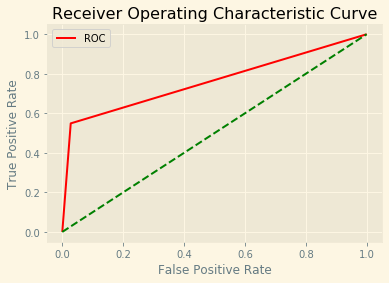

In [51]:
# Calculando a curva ROC
roc_auc = roc_auc_score(Y_Teste, previsoes)

# Print do resultado
print("AUC: %.3f" % (roc_auc * 100))

# Imprimindo o gráfico da curva ROC
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(Y_Teste, previsoes)    
plot_roc_curve(fper, tper)

In [52]:
# Calculando a Confusion Matrix
matrixXGB = confusion_matrix(Y_Teste, previsoes)

# Prints dos resultados
print(matrixXGB)

[[1403   40]
 [ 101  123]]


# Otimização De Ajustes

In [53]:
# Definindo qual conjunto de dados de treino, já escalado, deve ser utilizado e a sua variável target.
X = VarTreinoPadronizadas[fs]
Y = targetTreino

# Definindo qual conjunto de dados de teste, já escalado, deve ser utilizado e a sua variável target.
testX = VarTeste

# Definindo os valores que devem ser testados, em cada um dos parâmetros do modelo especificado.
paramGrid = dict (
    missing          = [np.nan],
    max_depth        = [3, 4, 6], 
    n_estimators     = [340, 350, 360], 
    learning_rate    = [0.05, 0.15, 0.03], 
    nthread          = [4], 
    subsample        = [0.94, 0.95], 
    colsample_bytree = [ 0.5 , 0.7, 0.85], 
    seed             = [100],
    gamma            = [0.5, 1, 2, 5]
)

# Criando uma instância da classe do modelo Random Forest.
model = xgb.XGBClassifier()

# Criando o grid, para fazer a busca dos melhores parâmetros para o modelo.
grid = GridSearchCV(estimator = model, param_grid = paramGrid, cv = 10, verbose = True, n_jobs = -1)

# Buscando pelos melhores parâmetros para o modelo.
grid.fit(X, Y)

# Exibindo a configuração, do melhor modelo treinado.
print("\n" + "Melhores Parâmetros para o Modelo:" + "\n\n", grid.best_estimator_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 16.1min finished



Melhores Parâmetros para o Modelo:

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=340, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=100, subsample=0.94, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [54]:
# Criando o modelo, com a melhor configuração encontrada.
classifierXGB = grid.best_estimator_

# Treinando o modelo.
classifierXGB.fit (
    X                     = X_Treino, 
    y                     = Y_Treino,
    early_stopping_rounds = 20,
    eval_metric           = "auc", 
    eval_set              = [(X_Teste, Y_Teste)]
)


[0]	validation_0-auc:0.76207
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.88577
[2]	validation_0-auc:0.88838
[3]	validation_0-auc:0.88647
[4]	validation_0-auc:0.88638
[5]	validation_0-auc:0.90245
[6]	validation_0-auc:0.90033
[7]	validation_0-auc:0.90222
[8]	validation_0-auc:0.90207
[9]	validation_0-auc:0.90224
[10]	validation_0-auc:0.90187
[11]	validation_0-auc:0.90125
[12]	validation_0-auc:0.90198
[13]	validation_0-auc:0.90232
[14]	validation_0-auc:0.90281
[15]	validation_0-auc:0.90260
[16]	validation_0-auc:0.90325
[17]	validation_0-auc:0.90315
[18]	validation_0-auc:0.90232
[19]	validation_0-auc:0.90346
[20]	validation_0-auc:0.90476
[21]	validation_0-auc:0.90397
[22]	validation_0-auc:0.90419
[23]	validation_0-auc:0.90428
[24]	validation_0-auc:0.90469
[25]	validation_0-auc:0.90438
[26]	validation_0-auc:0.90403
[27]	validation_0-auc:0.90375
[28]	validation_0-auc:0.90396
[29]	validation_0-auc:0.90433
[30]	validation_0-auc:0.90406
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=340, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=100, subsample=0.94, tree_method='exact',
              validate_parameters=1, verbosity=None)

##### Avalização do Modelo Otimizado

AUC: 74.688


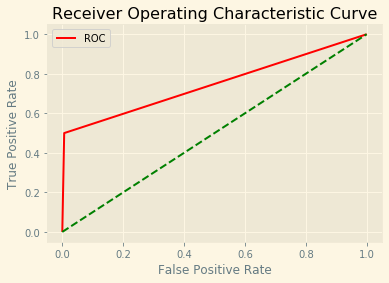

In [55]:
previsoes = classifierXGB.predict(X_Teste)

# Calculando a curva ROC
roc_auc = roc_auc_score(Y_Teste, previsoes)

# Print do resultado
print("AUC: %.3f" % (roc_auc * 100))

# Imprimindo o gráfico da curva ROC
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(Y_Teste, previsoes)    
plot_roc_curve(fper, tper)

Como podemos ver, a otimização de ajustes trouxe um resultado negativo e com isso podemos concluir que o melhor modelo foi o XGBoost com os dados padronizados e sem nenhuma otimização

Nosso Score alcançado foi de: 76.069%

Como foi solicitado pelo cliente final que passe a probabilidade do cliente desistir ou não do plano, deixo o código abaixo para calcular a probablidade com o melhor modelo:

In [56]:
# Carregando os dados de treino
array = VarTeste.values

# Separando o array em componentes de input e output
X_Teste = array[:,0:5]
Y_Teste = targetTest

# Carregando os dados de treino
array = VarTreinoPadronizadas[fs].values

# Separando o array em componentes de input e output
X_Treino = array[:,0:5]
Y_Treino = targetTreino

# Criando o modelo
model = xgb.XGBClassifier()

# Cross Validation
model.fit(X_Treino, Y_Treino)

# Fazendo as previsões
previsoes = model.predict_proba(X_Teste)[:, 1]

# Criando um dataframe com o as probabilidades dos clientes
final = pd.DataFrame({
    'PROB': previsoes})

# Salvando o arquivo
final.to_csv('previsoes/Final.csv', index = False)

# Imprimindo na tela a probabilidade de cada cliente desistir do plano com os dados de teste:
final

,PROB
0,0.002178
1,0.093676
2,0.008808
3,0.001744
4,0.003791
...,...
1662,0.017926
1663,0.003210
1664,0.017236
1665,0.028226


# FIM